# Regressão Softmax com dados do MNIST utilizando gradiente descendente estocástico por minibatches

O objetivo deste notebook é ilustrar
- o uso do gradiente estocástico por mini-batchs
- utilizando as classes Dataset e DataLoater.

A apresentação da perda nos gráficos é um pouco diferente da usual, mostrando a perda de cada um dos vários minibatches dentro de cada época, de forma que as épocas são apresentadas com valores fracionários.

## Importação das bibliotecas

In [108]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import torch
from torch.autograd import Variable
from torch.utils.data import DataLoader

import torchvision
from torchvision.datasets import MNIST

## Dataset e dataloader

### Definição do tamanho do minibatch

In [109]:
batch_size = 100

### Carregamento, criação dataset e do dataloader

In [110]:
dataset_dir = 'MNIST/'

dataset_train = MNIST(dataset_dir, train=True, download=True,
                      transform=torchvision.transforms.ToTensor())

loader_train = DataLoader(dataset_train, batch_size=batch_size, shuffle=True)

print('Número de minibatches de trenamento:', len(loader_train))

x_train, y_train = next(iter(loader_train))
print("\nDimensões dos dados de um minibatch:", x_train.size())
print("Valores mínimo e máximo dos pixels: ", torch.min(x_train), torch.max(x_train))
print("Tipo dos dados das imagens:         ", type(x_train))
print("Tipo das classes das imagens:       ", type(y_train))

Número de minibatches de trenamento: 600

Dimensões dos dados de um minibatch: torch.Size([100, 1, 28, 28])
Valores mínimo e máximo dos pixels:  tensor(0.) tensor(1.)
Tipo dos dados das imagens:          <class 'torch.Tensor'>
Tipo das classes das imagens:        <class 'torch.Tensor'>


### Usando todas as amostras do MNIST

Neste exemplo utilizaremos todas as amostras de treinamento.

In [111]:
print('Número de minibatches de trenamento:', len(loader_train))
n_batches_train = len(loader_train)
total_samples = dataset_train.train_data.size(0)

Número de minibatches de trenamento: 600


## Modelo

In [112]:
model = torch.nn.Linear(28*28, 10)

In [113]:
x = torch.ones(28*28).reshape(1, 784)
print(x.shape)
predict = model(x)
predict

torch.Size([1, 784])


tensor([[ 0.0114, -0.6115, -0.3399, -0.5383, -0.5843, -0.0492,  1.0328, -0.3224,
          0.3503, -0.5695]], grad_fn=<AddmmBackward0>)

## Treinamento

### Inicialização dos parâmetros

In [114]:
n_epochs = 5
learningRate = 0.5

# Utilizaremos CrossEntropyLoss como função de perda
criterion = torch.nn.CrossEntropyLoss()

# Gradiente descendente
optimizer = torch.optim.SGD(model.parameters(), lr=learningRate)

### Laço de treinamento dos parâmetros

In [115]:
epochs = []
losses = []

total_trained_samples = 0
for i in range(n_epochs):
    for k,(x_train, y_train) in enumerate(loader_train):
        # Transforma a entrada para uma dimensão
        inputs = Variable(x_train.view(-1, 28 * 28))
        # predict da rede
        outputs = model(inputs)

        # calcula a perda
        loss = criterion(outputs, Variable(y_train))

        # zero, backpropagation, ajusta parâmetros pelo gradiente descendente
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

         # >>> PRINT NO FINAL DE CADA MINIBATCH <<<
        print(f"Época: {i + 1}/{n_epochs}, batch: {k + 1}")

        total_trained_samples += x_train.size(0)
        epochs.append(total_trained_samples / total_samples)
        losses.append(loss.data)

      

Época: 1/5, batch: 1
Época: 1/5, batch: 2
Época: 1/5, batch: 3
Época: 1/5, batch: 4
Época: 1/5, batch: 5
Época: 1/5, batch: 6
Época: 1/5, batch: 7
Época: 1/5, batch: 8
Época: 1/5, batch: 9
Época: 1/5, batch: 10
Época: 1/5, batch: 11
Época: 1/5, batch: 12
Época: 1/5, batch: 13
Época: 1/5, batch: 14
Época: 1/5, batch: 15
Época: 1/5, batch: 16
Época: 1/5, batch: 17
Época: 1/5, batch: 18
Época: 1/5, batch: 19
Época: 1/5, batch: 20
Época: 1/5, batch: 21
Época: 1/5, batch: 22
Época: 1/5, batch: 23
Época: 1/5, batch: 24
Época: 1/5, batch: 25
Época: 1/5, batch: 26
Época: 1/5, batch: 27
Época: 1/5, batch: 28
Época: 1/5, batch: 29
Época: 1/5, batch: 30
Época: 1/5, batch: 31
Época: 1/5, batch: 32
Época: 1/5, batch: 33
Época: 1/5, batch: 34
Época: 1/5, batch: 35
Época: 1/5, batch: 36
Época: 1/5, batch: 37
Época: 1/5, batch: 38
Época: 1/5, batch: 39
Época: 1/5, batch: 40
Época: 1/5, batch: 41
Época: 1/5, batch: 42
Época: 1/5, batch: 43
Época: 1/5, batch: 44
Época: 1/5, batch: 45
Época: 1/5, batch: 

In [116]:
print('Final loss:', loss.data)

Final loss: tensor(0.3736)


### Visualizando gráfico de perda durante o treinamento

Text(0.5, 0, 'época')

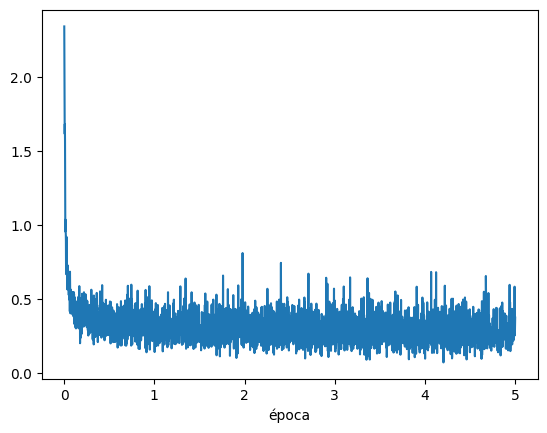

In [117]:
plt.plot(epochs, losses)
plt.xlabel('época')

### Visualização usual da perda, somente no final de cada minibatch

Text(0.5, 0, 'época')

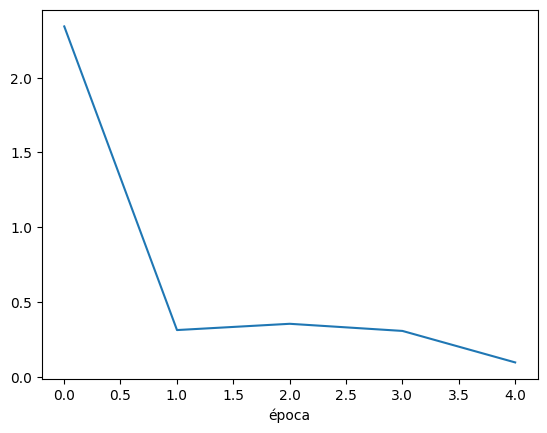

In [118]:
plt.plot(epochs[:5 * n_batches_train +1:n_batches_train], losses[:5 * n_batches_train+1:n_batches_train])
plt.xlabel('época')

# Atividades

## Perguntas

In [119]:
# 1. Qual é o tamanho do mini-batch?
batch_size

100

In [120]:
# 2. Em uma época, quantos mini-batches existem?
print('Quantos mini-batches existem:',len(dataset_train)/batch_size)



Quantos mini-batches existem: 600.0


3. Qual é a definição de época?

Época é uma passagem completa por todo o conjunto de treinamento.

Ou seja:

✔ A rede vê todas as amostras uma vez.

✔ Todos os mini-batches do dataset são processados.

✔ Todo o conjunto de treinamento contribui para atualizar os pesos pelo menos uma vez.

🔍 Exemplo com o notebook que você está estudando

Dataset MNIST → 60.000 imagens
batch_size = 100
mini-batches por época = 600

Então:

👉 1 época = 600 atualizações de gradiente (600 mini-batches)

👉 Depois dos 600 mini-batches, encerramos a época

👉 A próxima época recomeça do primeiro mini-batch (com shuffle=True normalmente)

## Exercícios


1. Coloque um print no final de cada minibatch, no mesmo estilo do print do final de época, no seguinte estilo: - Época: 1/4, batch: 600

    👉 foi  colocado dentro do laço de treinamento


2. Altere o tamanho de minibatch (batch_size) algumas vezes, refaça o treinamento, e compare no gráfico abaixo a queda da perda para cada tamanho de minibatch.

Para batch_size = 100:  ****************************************************** Para batch_size = 200:

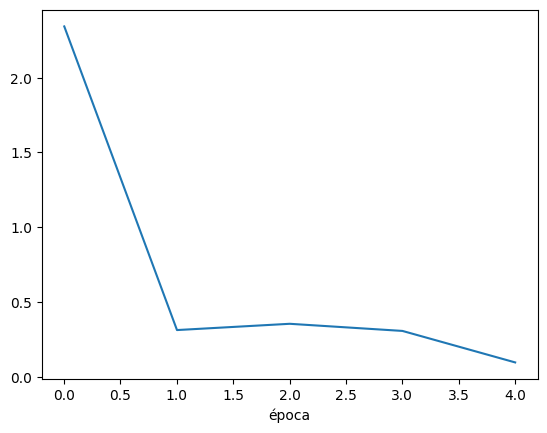            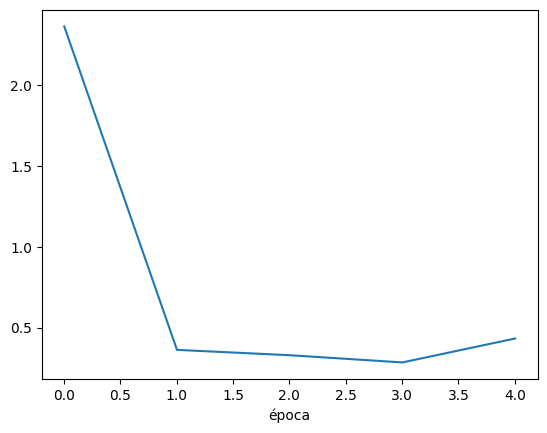


Para batch_size = 500:   ******************************************************* Para batch_size = 5000:

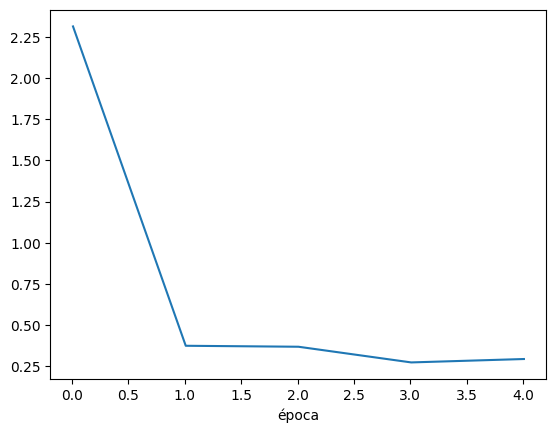        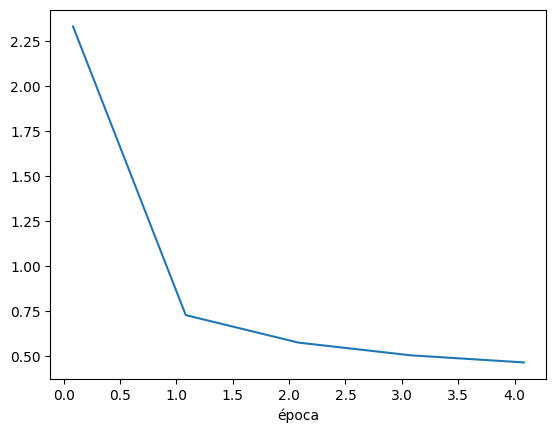

## Conclusões sobre os experimentos deste notebook
